## Mean Field Approximation on Random Networks

In [1]:
import matplotlib
import random
from pylab import *
import networkx as nx
import pycxsimulator
matplotlib.use('TkAgg')

def initialize():
    global g
    g = nx.generators.random_graphs.erdos_renyi_graph(n, p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    g2 = g.copy()
    g2.pos = g.pos
    for a in list(g.nodes):
        if g.nodes[a]['state'] == 0: # if susceptible
            for b in list(g.neighbors(a)):
                if g.nodes[b]['state'] == 1: # if neighbor b is infected
                    g2.nodes[a]['state'] = 1 if random() < p_i else 0
        else: # if infected
            g2.nodes[a]['state'] = 0 if random() < p_r else 1
    g = g2

/Users/jacob/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


AttributeError: 'FigureManagerBase' object has no attribute 'window'

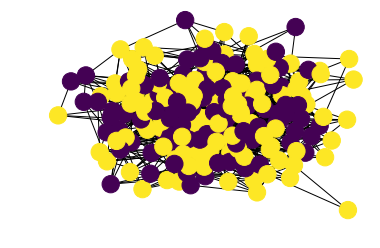

In [2]:
n, p_e, p_i, p_r = 100, 0.1, 0.5, 0.5
n, p_e, p_i, p_r = 100, 0.1, 0.04, 0.5
n, p_e, p_i, p_r = 200, 0.1, 0.04, 0.5
n, p_e, p_i, p_r = 200, 0.05, 0.04, 0.5

pycxsimulator.GUI().start(func=[initialize, observe, update])

### Synchronous vs Asynchronous Updating
In synchronous updates, neighboring nodes can change at the same time, where each change does not influence the other, that means an infected node can heal at the same time as a healthy node gets infected by it.

It is appropriate to use synchronous, rather than asynchronous updating for MFA, speicifically in this case, since contact in the real world tends to happen across many nodes at a time, rather than just between 2 nodes.

In [16]:
from networkx import gnm_random_graph
from networkx.generators.random_graphs import watts_strogatz_graph, barabasi_albert_graph

for g in [gnm_random_graph(1000,20000), 
          watts_strogatz_graph(1000, 40, .1), 
          barabasi_albert_graph(1000, 21)]:
    print(f"You have, on average, {np.mean(g.degree, axis=0)[1]} friends.")
    print(f"Your friends have, on average, {np.mean([(g.degree[e[0]], g.degree[e[1]]) for e in g.edges])} friends. \n")

You have, on average, 40.0 friends.
Your friends have, on average, 41.01185 friends 

You have, on average, 40.0 friends.
Your friends have, on average, 40.09815 friends 

You have, on average, 41.118 friends.
Your friends have, on average, 63.71574492922807 friends 

